# 0.) Import the Credit Card Fraud Data From CCLE

In [1]:
import pandas as pd
#from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("fraudTest.csv")

In [3]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [4]:
df_select = df[["trans_date_trans_time", "category", "amt", "city_pop", "is_fraud"]]

df_select["trans_date_trans_time"] = pd.to_datetime(df_select["trans_date_trans_time"])
df_select["time_var"] = [i.second for i in df_select["trans_date_trans_time"]]

X = pd.get_dummies(df_select, ["category"]).drop(["trans_date_trans_time", "is_fraud"], axis = 1)
y = df[["is_fraud"]]

/var/folders/l4/2p2qsjgx4yd0cjtw95rvsjwh0000gn/T/ipykernel_97271/1789677364.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select["trans_date_trans_time"] = pd.to_datetime(df_select["trans_date_trans_time"])
/var/folders/l4/2p2qsjgx4yd0cjtw95rvsjwh0000gn/T/ipykernel_97271/1789677364.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select["time_var"] = [i.second for i in df_select["trans_date_trans_time"]]


# 1.) Use scikit learn preprocessing to split the data into 70/30 in out of sample

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3)

In [7]:
X_train

,amt,city_pop,time_var,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
223306,37.07,2518,47,False,False,False,False,False,False,False,True,False,False,False,False,False,False
243830,2.34,1679,11,False,True,False,False,False,False,False,False,False,False,False,False,False,False
515232,44.40,16163,52,False,True,False,False,False,False,False,False,False,False,False,False,False,False
139547,62.38,3224,17,False,False,True,False,False,False,False,False,False,False,False,False,False,False
315221,73.49,551,23,False,False,False,False,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499572,43.53,2443,2,False,False,False,False,False,False,False,False,False,False,True,False,False,False
287393,62.34,18408,45,True,False,False,False,False,False,False,False,False,False,False,False,False,False
316677,65.11,1725,18,False,False,False,False,False,False,False,True,False,False,False,False,False,False
440020,71.63,67858,14,False,False,False,False,False,False,False,False,False,False,True,False,False,False


In [8]:
X_test, X_holdout, y_test, y_holdout = train_test_split(X_test, y_test, test_size = .5)

In [9]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_holdout = scaler.transform(X_holdout)

# 2.) Make three sets of training data (Oversample, Undersample and SMOTE)

In [10]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [11]:
ros = RandomOverSampler()
over_X, over_y = ros.fit_resample(X_train, y_train)

rus = RandomUnderSampler()
under_X, under_y = rus.fit_resample(X_train, y_train)

smote = SMOTE()
smote_X, smote_y = smote.fit_resample(X_train, y_train)

# 3.) Train three logistic regression models

In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
over_log = LogisticRegression().fit(over_X, over_y)

under_log = LogisticRegression().fit(under_X, under_y)

smote_log = LogisticRegression().fit(smote_X, smote_y)

/Users/weijiayu/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/weijiayu/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/weijiayu/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# 4.) Test the three models

In [14]:
over_log.score(X_test, y_test)

0.9178003311019938

In [15]:
under_log.score(X_test, y_test)

0.9108064013052136

In [16]:
smote_log.score(X_test, y_test)

0.9178963026944025

In [67]:
# We see SMOTE performing with higher accuracy but is ACCURACY really the best measure?

# 5.) Which performed best in Out of Sample metrics?

In [68]:
# Sensitivity here in credit fraud is more important as seen from last class

In [17]:
from sklearn.metrics import confusion_matrix

In [18]:
y_true = y_test

In [19]:
y_pred = over_log.predict(X_test)
cm = confusion_matrix(y_true, y_pred)
cm

array([[76273,  6772],
       [   80,   233]])

In [20]:
print("Over Sample Sensitivity : ", cm[1,1] /( cm[1,0] + cm[1,1]))

Over Sample Sensitivity :  0.744408945686901


In [21]:
y_pred = under_log.predict(X_test)
cm = confusion_matrix(y_true, y_pred)
cm

array([[75689,  7356],
       [   79,   234]])

In [22]:
print("Under Sample Sensitivity : ", cm[1,1] /( cm[1,0] + cm[1,1]))

Under Sample Sensitivity :  0.7476038338658147


In [23]:
y_pred = smote_log.predict(X_test)
cm = confusion_matrix(y_true, y_pred)
cm

array([[76281,  6764],
       [   80,   233]])

In [24]:
print("SMOTE Sample Sensitivity : ", cm[1,1] /( cm[1,0] + cm[1,1]))

SMOTE Sample Sensitivity :  0.744408945686901


# 6.) Pick two features and plot the two classes before and after SMOTE.

In [25]:
raw_temp = pd.concat([pd.DataFrame(X_train), pd.DataFrame(y_train)],axis=1)

In [26]:
raw_temp

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,is_fraud
0,-0.214237,-0.285189,1.012773,-0.278751,-0.274627,-0.336593,-0.191212,-0.322397,-0.265826,-0.322066,3.229577,-0.22789,-0.257957,-0.275508,-0.285052,-0.314805,-0.180311,0.0
1,-0.445697,-0.287971,-1.068059,-0.278751,3.641307,-0.336593,-0.191212,-0.322397,-0.265826,-0.322066,-0.309638,-0.22789,-0.257957,-0.275508,-0.285052,-0.314805,-0.180311,NaN
2,-0.165386,-0.239943,1.301778,-0.278751,3.641307,-0.336593,-0.191212,-0.322397,-0.265826,-0.322066,-0.309638,-0.22789,-0.257957,-0.275508,-0.285052,-0.314805,-0.180311,0.0
3,-0.045558,-0.282848,-0.721254,-0.278751,-0.274627,2.970948,-0.191212,-0.322397,-0.265826,-0.322066,-0.309638,-0.22789,-0.257957,-0.275508,-0.285052,-0.314805,-0.180311,NaN
4,0.028485,-0.291711,-0.374448,-0.278751,-0.274627,-0.336593,-0.191212,3.101766,-0.265826,-0.322066,-0.309638,-0.22789,-0.257957,-0.275508,-0.285052,-0.314805,-0.180311,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458779,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
431549,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
418131,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
499572,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [80]:
#plt.scatter(raw_temp[raw_temp["is_fraud"] == 0]["amt"], raw_temp[raw_temp["is_fraud"] == 0]["city_pop"])

plt.scatter(raw_temp[raw_temp["is_fraud"] == 1]["amt"], raw_temp[raw_temp["is_fraud"] == 1]["city_pop"])
plt.legend(["Fraud", "Not Fraud"])
plt.xlabel("Amount")
plt.ylabel("Population")

plt.show()

KeyError: 'amt'

In [81]:

raw_temp = pd.concat([smote_X, smote_y], axis =1)


TypeError: cannot concatenate object of type '<class 'numpy.ndarray'>'; only Series and DataFrame objs are valid

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


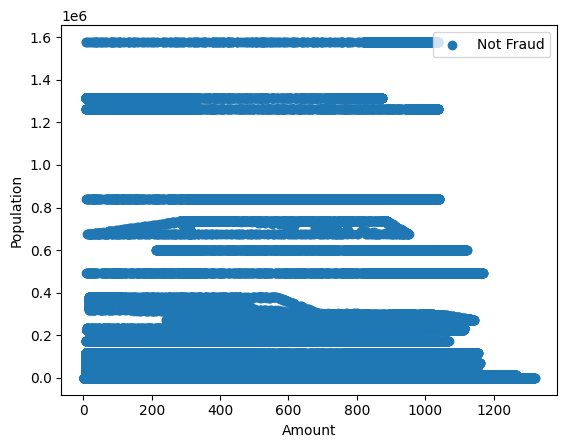

In [ ]:
#plt.scatter(raw_temp[raw_temp["is_fraud"] == 0]["amt"], raw_temp[raw_temp["is_fraud"] == 0]["city_pop"])

plt.scatter(raw_temp[raw_temp["is_fraud"] == 1]["amt"], raw_temp[raw_temp["is_fraud"] == 1]["city_pop"])
plt.legend([ "Not Fraud", "Fraud"])
plt.xlabel("Amount")
plt.ylabel("Population")

plt.show()

# 7.) We want to compare oversampling, Undersampling and SMOTE across our 3 models (Logistic Regression, Logistic Regression Lasso and Decision Trees).

# Make a dataframe that has a dual index and 9 Rows.
# Calculate: Sensitivity, Specificity, Precision, Recall and F1 score. for out of sample data.
# Notice any patterns across perfomance for this model. Does one totally out perform the others IE. over/under/smote or does a model perform better DT, Lasso, LR?
# Choose what you think is the best model and why. test on Holdout

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import pandas as pd

In [28]:
def evaluate_model(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)  # Recall is the same as sensitivity
    f1 = f1_score(y_true, y_pred)
    return sensitivity, specificity, precision, recall, f1

In [29]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Logistic Regression Lasso': LogisticRegression(penalty='l1', solver='saga', max_iter=1000),
    'Decision Trees': DecisionTreeClassifier()
}

# Define the sampling techniques
sampling_techniques = {
    'Oversampling': RandomOverSampler(random_state=42),
    'Undersampling': RandomUnderSampler(random_state=42),
    'SMOTE': SMOTE(random_state=42)
}

# DataFrame to store the performance metrics
metrics = ['Sensitivity', 'Specificity', 'Precision', 'Recall', 'F1 Score']
index = pd.MultiIndex.from_product([models.keys(), sampling_techniques.keys()], names=['Model', 'Sampling Technique'])
df_performance = pd.DataFrame(index=index, columns=metrics)

# Loop through each model and sampling technique, train, and evaluate
for model_name, model in models.items():
    for technique_name, technique in sampling_techniques.items():
        # Apply sampling technique
        X_resampled, y_resampled = technique.fit_resample(X_train, y_train)
        
        # Train the model
        model.fit(X_resampled, y_resampled)
        
        # Make predictions on the test set
        y_pred = model.predict(X_holdout)
        
        # Evaluate the model
        sensitivity, specificity, precision, recall, f1 = evaluate_model(y_holdout, y_pred)
        
        # Store the performance metrics
        df_performance.loc[(model_name, technique_name), :] = sensitivity, specificity, precision, recall, f1

# Display the performance DataFrame
print(df_performance)

/Users/weijiayu/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/weijiayu/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/weijiayu/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/weijiayu/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expec

                                             Sensitivity Specificity  \
Model                     Sampling Technique                           
Logistic Regression       Oversampling          0.712934    0.919618   
                          Undersampling         0.712934    0.918679   
                          SMOTE                 0.712934    0.916884   
Logistic Regression Lasso Oversampling          0.712934    0.919618   
                          Undersampling         0.712934    0.919775   
                          SMOTE                 0.712934    0.916848   
Decision Trees            Oversampling          0.526814    0.998459   
                          Undersampling         0.940063    0.946231   
                          SMOTE                 0.716088    0.992811   

                                             Precision    Recall  F1 Score  
Model                     Sampling Technique                                
Logistic Regression       Oversampling        0.03274

In [32]:
df_performance = df_performance.astype(float)

# Calculate minimum values for each sampling technique across all models
max_by_sampling = df_performance.groupby(level='Sampling Technique').max()

# Calculate minimum values for each model across all sampling techniques
max_by_model = df_performance.groupby(level='Model').max()

# Display the performance DataFrame and minimum values
print("Performance Metrics:")
print(df_performance)
print("\nMax Values by Sampling Technique:")
print(max_by_sampling)
print("\nMax Values by Model:")
print(max_by_model)

Performance Metrics:
                                              Sensitivity  Specificity  \
Model                     Sampling Technique                             
Logistic Regression       Oversampling           0.712934     0.919618   
                          Undersampling          0.712934     0.918679   
                          SMOTE                  0.712934     0.916884   
Logistic Regression Lasso Oversampling           0.712934     0.919618   
                          Undersampling          0.712934     0.919775   
                          SMOTE                  0.712934     0.916848   
Decision Trees            Oversampling           0.526814     0.998459   
                          Undersampling          0.940063     0.946231   
                          SMOTE                  0.716088     0.992811   

                                              Precision    Recall  F1 Score  
Model                     Sampling Technique                                 
Logistic

Sensitivity (Recall): Decision Trees with Undersampling shows a remarkably high sensitivity, significantly outperforming other model-sampling combinations. High sensitivity is crucial if the cost of false negatives is high.

Specificity: Decision Trees with Oversampling exhibits the highest specificity, which indicates its strength in correctly identifying the negatives. However, this comes with a trade-off in sensitivity.

Precision: Decision Trees with Oversampling also has the highest precision, which means it has a lower false positive rate.

F1 Score: The F1 Score balances the precision and recall, and we can see that Decision Trees with Oversampling have the highest F1 score, indicating a balanced performance between precision and recall.

Given these observations, the Decision Trees with Oversampling seem to perform best overall based on the F1 Score, which is a harmonic mean of precision and recall. 

But there is not a resampling method that outperformance others when models change. SMOTE works better at  recall and sensitivity, oversampling works better at Specificity, precision and F-1 score, while undersampling works better at sensitivity and recall.

All in all, I prefer the Decision Trees with Oversampling.
